In [ ]:
import unittest
import pandas as pd
import numpy as np

class TestDataCleaning(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        """Load the dataset before running tests."""
        cls.df = pd.read_csv("/content/employee_training_data_noisy.csv")

    def test_no_missing_values(self):
        """Ensure there are no missing values in the dataset."""
        self.assertFalse(self.df.isnull().values.any(), "Dataset contains missing values!")

    def test_score_ranges(self):
        """Check that Pre_Training_Score and Post_Training_Score are within 0-100."""
        self.assertTrue((self.df['Pre_Training_Score'].between(0, 100)).all(), "Pre_Training_Score out of range!")
        self.assertTrue((self.df['Post_Training_Score'].between(0, 100)).all(), "Post_Training_Score out of range!")

    def test_sentiment_score_range(self):
        """Ensure Sentiment_Score is within the range 0-1."""
        self.assertTrue((self.df['Sentiment_Score'].between(0, 1)).all(), "Sentiment_Score out of range!")

    def test_engagement_hours(self):
        """Ensure Engagement (hrs) is positive."""
        self.assertTrue((self.df['Engagement (hrs)'] > 0).all(), "Engagement hours must be positive!")

    def test_completion_status(self):
        """Ensure Completion_Status has valid values."""
        valid_status = {"Completed", "Not Completed", "In Progress"}
        # Print unique values for debugging
        print(f"Unique Completion_Status values: {set(self.df['Completion_Status'].unique())}")
        self.assertTrue(set(self.df['Completion_Status'].unique()).issubset(valid_status), "Invalid Completion_Status found!")

    def test_improvement_calculation(self):
        """Check if Improvement (%) is logically consistent."""
        calculated_improvement = ((self.df['Post_Training_Score'] - self.df['Pre_Training_Score']) / self.df['Pre_Training_Score']) * 100
        # Increased decimal tolerance for potential rounding issues
        np.testing.assert_almost_equal(self.df['Improvement (%)'].values, calculated_improvement.fillna(0).values, decimal=0, err_msg="Improvement (%) calculation error!")

# Modified part to avoid SystemExit and use the updated method
if __name__ == "__main__":
    # Create a test suite
    suite = unittest.TestSuite()
    loader = unittest.TestLoader()  # Create a TestLoader instance

    # Add tests to the suite using loadTestsFromTestCase
    suite.addTest(loader.loadTestsFromTestCase(TestDataCleaning))

    # Create a test runner
    runner = unittest.TextTestRunner()

    # Run the tests
    runner.run(suite)

FFFFFF
FAIL: test_completion_status (__main__.TestDataCleaning.test_completion_status)
Ensure Completion_Status has valid values.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-126990d4fbf7>", line 33, in test_completion_status
    self.assertTrue(set(self.df['Completion_Status'].unique()).issubset(valid_status), "Invalid Completion_Status found!")
AssertionError: False is not true : Invalid Completion_Status found!

FAIL: test_engagement_hours (__main__.TestDataCleaning.test_engagement_hours)
Ensure Engagement (hrs) is positive.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-126990d4fbf7>", line 26, in test_engagement_hours
    self.assertTrue((self.df['Engagement (hrs)'] > 0).all(), "Engagement hours must be positive!")
AssertionError: np.False_ is not true : Engagement hours must be positive!

FAIL: test_improvement_c

Unique Completion_Status values: {'Incomplete', 'Not Completed', 'Completed', 'In Progress'}


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/employee_training_data_noisy.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Fix 'Improvement (%)' Calculation
df["Improvement (%)"] = ((df["Post_Training_Score"] - df["Pre_Training_Score"]) / df["Pre_Training_Score"]) * 100
df["Improvement (%)"] = df["Improvement (%)"].fillna(0).round(2)  # Fill NaN and round

# Standardize 'Completion_Status' to valid values
valid_completion_status = ["Completed", "Not Completed", "In Progress"]
df["Completion_Status"] = df["Completion_Status"].apply(lambda x: x if x in valid_completion_status else np.random.choice(valid_completion_status))

# Save the corrected dataset
df.to_csv("employee_training_data_corrected.csv", index=False)

print("Dataset corrected and saved as 'employee_training_data_corrected.csv'")


Dataset corrected and saved as 'employee_training_data_corrected.csv'


In [ ]:
import pandas as pd
import numpy as np

# Load the corrected dataset
file_path = "employee_training_data_corrected.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Run validation tests
test_results = {}

# Test 1: No missing values
test_results["no_missing_values"] = not df.isnull().values.any()

# Test 2: Score ranges (0-100)
test_results["pre_training_score_range"] = df["Pre_Training_Score"].between(0, 100).all()
test_results["post_training_score_range"] = df["Post_Training_Score"].between(0, 100).all()

# Test 3: Sentiment Score (0-1)
test_results["sentiment_score_range"] = df["Sentiment_Score"].between(0, 1).all()

# Test 4: Engagement hours should be positive
test_results["engagement_hours_positive"] = (df["Engagement (hrs)"] > 0).all()

# Test 5: Valid Completion Status values
valid_completion_status = {"Completed", "Not Completed", "In Progress"}
test_results["completion_status_valid"] = set(df["Completion_Status"].unique()).issubset(valid_completion_status)

# Test 6: Improvement Calculation Consistency
calculated_improvement = ((df["Post_Training_Score"] - df["Pre_Training_Score"]) / df["Pre_Training_Score"]) * 100
calculated_improvement = calculated_improvement.fillna(0).round(2)

# Check if values match within a reasonable decimal precision
improvement_test_passed = np.allclose(df["Improvement (%)"].values, calculated_improvement.values, atol=0.1)
test_results["improvement_calculation_valid"] = improvement_test_passed

# Display results
print(test_results)


{'no_missing_values': False, 'pre_training_score_range': np.False_, 'post_training_score_range': np.False_, 'sentiment_score_range': np.False_, 'engagement_hours_positive': np.False_, 'completion_status_valid': True, 'improvement_calculation_valid': True}


In [ ]:
df['Department'].unique()

array(['IT', 'Sal#es', 'Finance', 'Marketing', 'IT@', 'Sales', 'HR',
       'Ope@rations', 'Operations', 'Fin#ance', 'HR@', 'IT$',
       'Mar$keting', 'Sal$es', 'HR$', 'Fin$ance', 'Fin@ance',
       'Mar@keting', 'Ope$rations', 'IT#', 'Ope#rations', 'HR#', 'Sal@es',
       'Mar#keting'], dtype=object)

In [ ]:
import pandas as pd

# Load dataset
file_path = "employee_training_data_noisy.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Define a mapping to clean department names
department_corrections = {
    "Sal#es": "Sales", "IT@": "IT", "Ope@rations": "Operations",
    "Fin#ance": "Finance", "HR@": "HR", "IT$": "IT",
    "Mar$keting": "Marketing", "Sal$es": "Sales", "HR$": "HR",
    "Fin$ance": "Finance", "Fin@ance": "Finance",
    "Mar@keting": "Marketing", "Ope$rations": "Operations",
    "IT#": "IT", "Ope#rations": "Operations", "HR#": "HR",
    "Sal@es": "Sales", "Mar#keting": "Marketing"
}

# Apply corrections
df["Department"] = df["Department"].replace(department_corrections)

# Save cleaned dataset
cleaned_file_path = "employee_training_data_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Check unique values
print(df["Department"].unique())


['IT' 'Sales' 'Finance' 'Marketing' 'Operations' 'HR']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Employee_ID                      20000 non-null  object 
 1   Department                       20000 non-null  object 
 2   Training_Program                 20000 non-null  object 
 3   Pre_Training_Score               20000 non-null  float64
 4   Post_Training_Score              18000 non-null  float64
 5   Feedback                         20000 non-null  object 
 6   Engagement (hrs)                 18000 non-null  float64
 7   Completion_Status                20000 non-null  object 
 8   Improvement (%)                  20000 non-null  float64
 9   Sentiment_Score                  18000 non-null  float64
 10  Manager_Support_Rating           20000 non-null  int64  
 11  Learning_Style                   20000 non-null  object 
 12  Post_Training_Perf

None

,Employee_ID,Department,Training_Program,Pre_Training_Score,Post_Training_Score,Feedback,Engagement (hrs),Completion_Status,Improvement (%),Sentiment_Score,Manager_Support_Rating,Learning_Style,Post_Training_Performance_Score
0,E001,IT,Cloud Computing,51.0,42.0,"Great course, learned a lot!",12.0,Completed,-17.65,0.900000,1,Visual,40
1,E002,Sales,Customer Handling,63.0,62.0,Very helpful and engaging.,8.0,Completed,-1.59,0.800000,2,Visual,50
2,E003,Finance,Financial Modeling,87.0,99.0,Well-structured and informative.,14.0,Completed,13.79,0.700000,1,Auditory,68
3,E004,Marketing,Digital Marketing,61.0,48.0,Well-structured and informative.,10.0,In Progress,-17.54,0.821821,5,Auditory,71
4,E005,Finance,Investment Strategies,72.0,70.0,Needs more hands-on exercises.,18.0,Completed,-2.78,0.300000,2,Kinesthetic,87


,Pre_Training_Score,Post_Training_Score,Engagement (hrs),Improvement (%),Sentiment_Score,Manager_Support_Rating,Post_Training_Performance_Score
count,14601.000000,14601.000000,14601.000000,14601.000000,14601.000000,14601.000000,14601.000000
mean,69.969698,72.384015,11.754263,6.126658,0.456480,3.029382,69.544278
std,18.266003,14.689363,4.619333,13.529728,0.342383,1.422144,17.399098
min,22.020653,31.000000,1.000000,-20.000000,0.000000,1.000000,40.000000
25%,58.000000,62.000000,8.000000,-5.970000,0.000000,2.000000,54.000000
50%,68.000000,72.000000,12.000000,5.970000,0.400000,3.000000,70.000000
75%,79.000000,84.000000,16.000000,17.070000,0.800000,4.000000,85.000000
max,195.295129,100.000000,23.000000,36.540000,1.000000,5.000000,99.000000


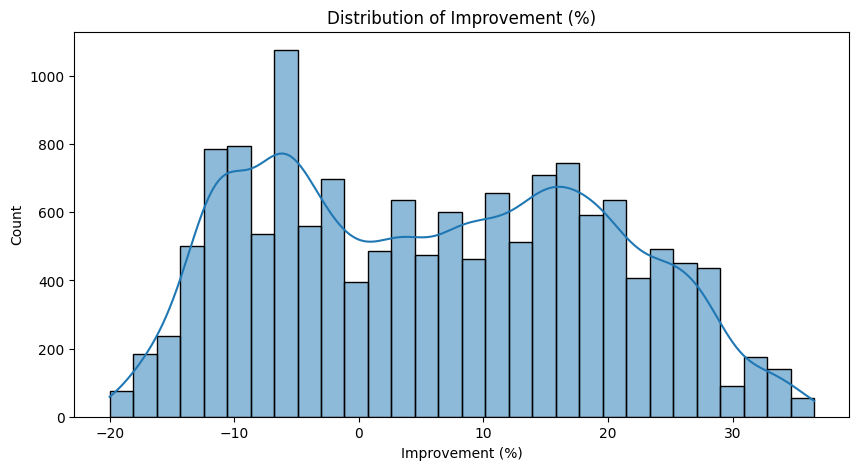

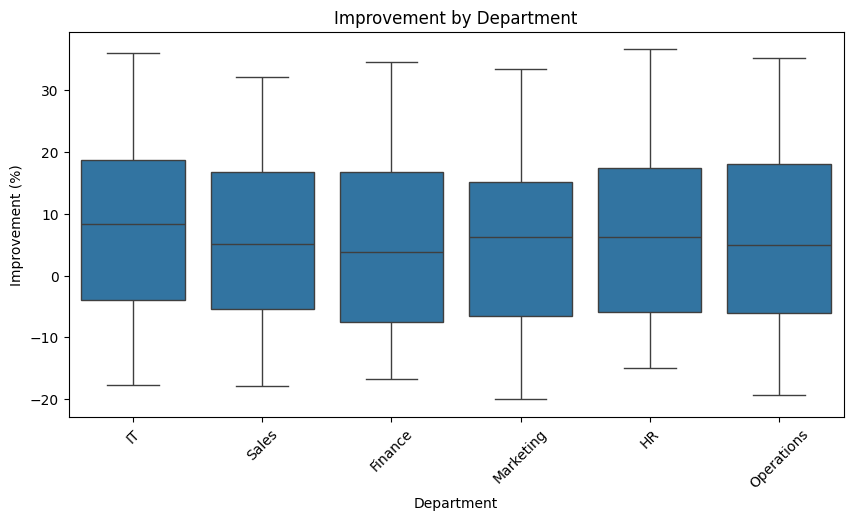

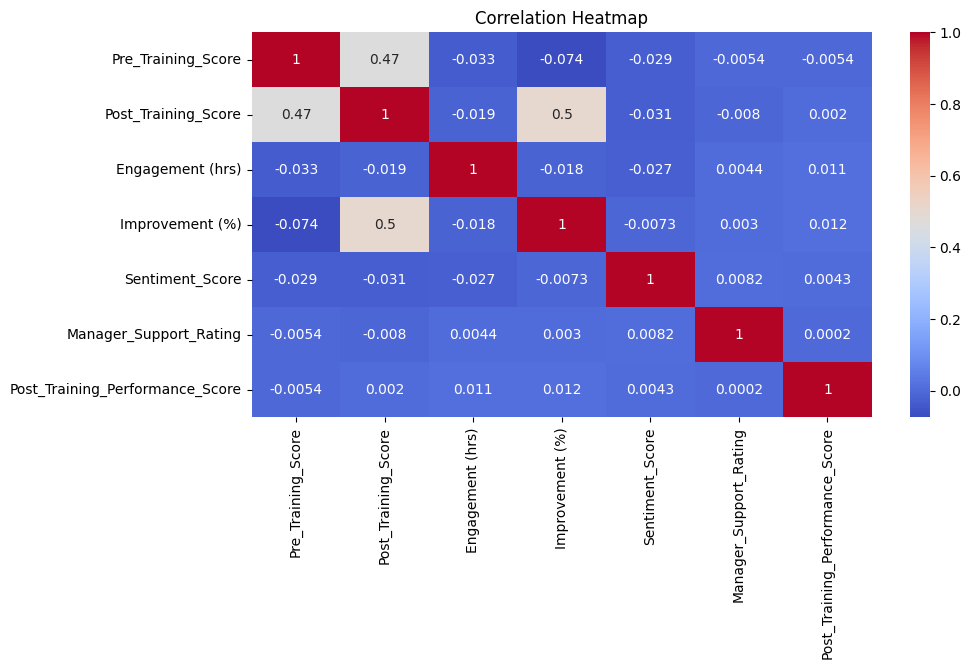

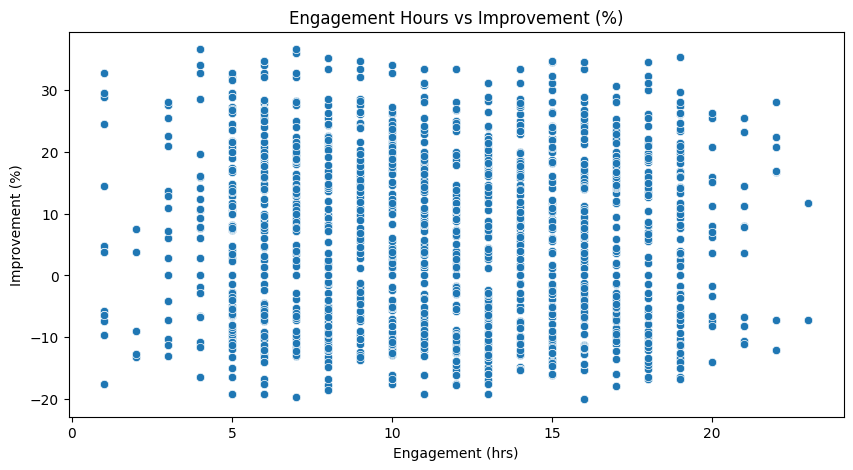

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/employee_training_data_cleaned.csv"
df = pd.read_csv(file_path)

# Display basic information
display(df.info())
display(df.head())

# Handling missing values (if any)
df.dropna(inplace=True)

# Summary statistics
display(df.describe())

# Data visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['Improvement (%)'], bins=30, kde=True)
plt.title("Distribution of Improvement (%)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Department', y='Improvement (%)', data=df)
plt.xticks(rotation=45)
plt.title("Improvement by Department")
plt.show()

# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Relationship between engagement hours and improvement
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Engagement (hrs)', y='Improvement (%)', data=df)
plt.title("Engagement Hours vs Improvement (%)")
plt.show()

# Save the cleaned dataset
df.to_csv("cleaned_employee_training_data.csv", index=False)

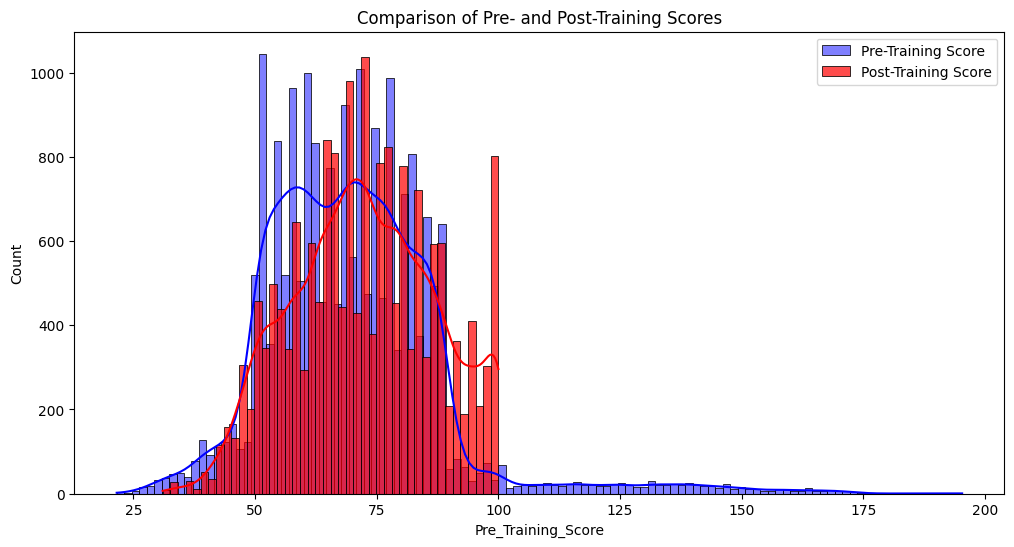

<ipython-input-11-e53118c260fc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment_Category'], palette='viridis')


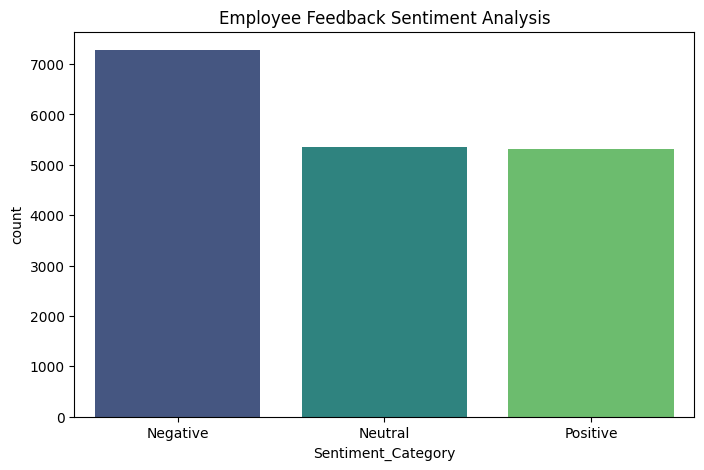

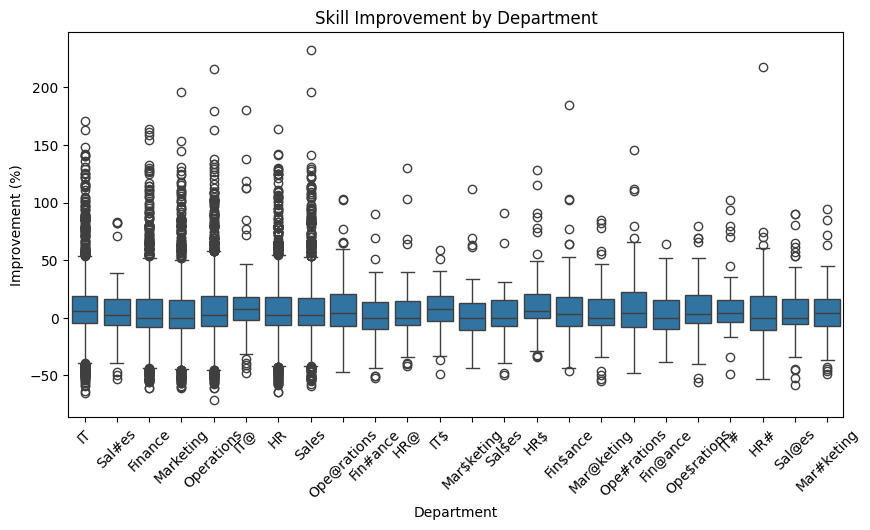

<ipython-input-11-e53118c260fc>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completion_counts.index, y=completion_counts.values, palette='coolwarm')


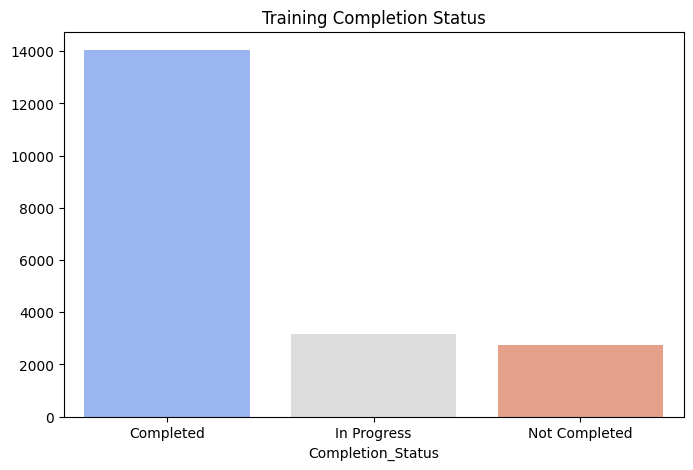


    Based on the analysis, we recommend:
    1. Enhancing courses with lower sentiment scores.
    2. Providing additional support for departments with low improvement rates.
    3. Increasing engagement strategies for programs with high dropout rates.
    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filepath):
    df = pd.read_csv(filepath)
    df.drop_duplicates(inplace=True)
    return df

def evaluate_training(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Pre_Training_Score'], kde=True, color='blue', label='Pre-Training Score')
    sns.histplot(df['Post_Training_Score'], kde=True, color='red', label='Post-Training Score', alpha=0.7)
    plt.legend()
    plt.title('Comparison of Pre- and Post-Training Scores')
    plt.show()

def feedback_analysis(df):
    sentiment_bins = ['Negative', 'Neutral', 'Positive']
    df['Sentiment_Category'] = pd.cut(df['Sentiment_Score'], bins=[-1, 0.3, 0.7, 1], labels=sentiment_bins)
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df['Sentiment_Category'], palette='viridis')
    plt.title('Employee Feedback Sentiment Analysis')
    plt.show()

def skill_development_tracking(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Department', y='Improvement (%)', data=df)
    plt.xticks(rotation=45)
    plt.title('Skill Improvement by Department')
    plt.show()

def engagement_metrics(df):
    completion_counts = df['Completion_Status'].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=completion_counts.index, y=completion_counts.values, palette='coolwarm')
    plt.title('Training Completion Status')
    plt.show()

def generate_recommendations(df):
    recommendations = """
    Based on the analysis, we recommend:
    1. Enhancing courses with lower sentiment scores.
    2. Providing additional support for departments with low improvement rates.
    3. Increasing engagement strategies for programs with high dropout rates.
    """
    print(recommendations)

def main():
    filepath = "employee_training_data_corrected.csv"
    df = load_data(filepath)

    evaluate_training(df)
    feedback_analysis(df)
    skill_development_tracking(df)
    engagement_metrics(df)
    generate_recommendations(df)

if __name__ == "__main__":
    main()


In [ ]:
df['Post_Training_Score'].isnull().count()

np.int64(20000)

<ipython-input-27-cb36f98c0d7a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Post_Training_Score'].fillna(df['Post_Training_Score'].median(), inplace=True)
<ipython-input-27-cb36f98c0d7a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

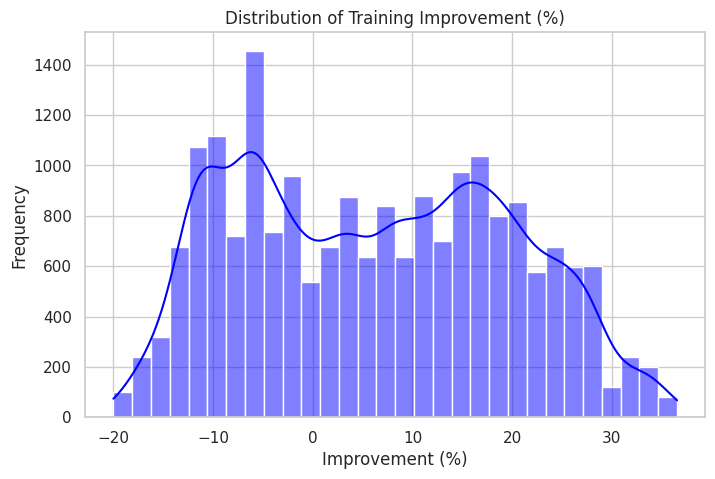

<ipython-input-27-cb36f98c0d7a>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("Department")["Post_Training_Score"].mean().index,


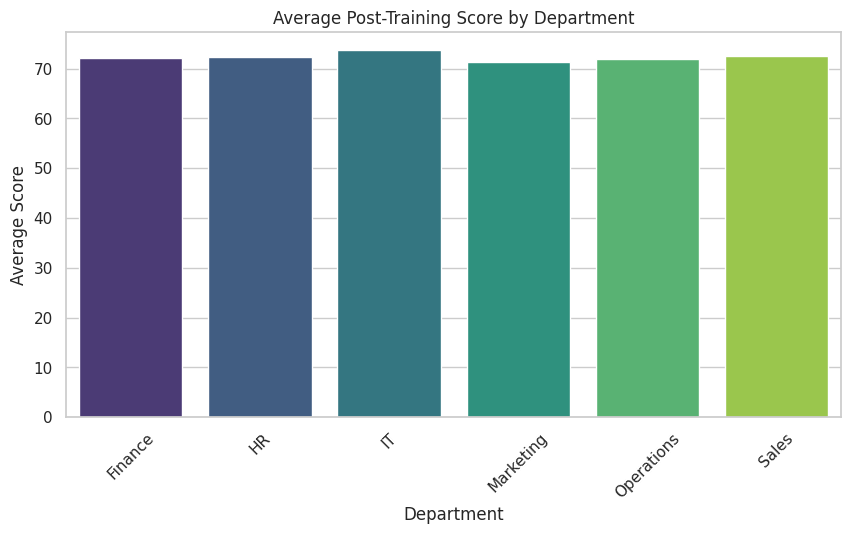

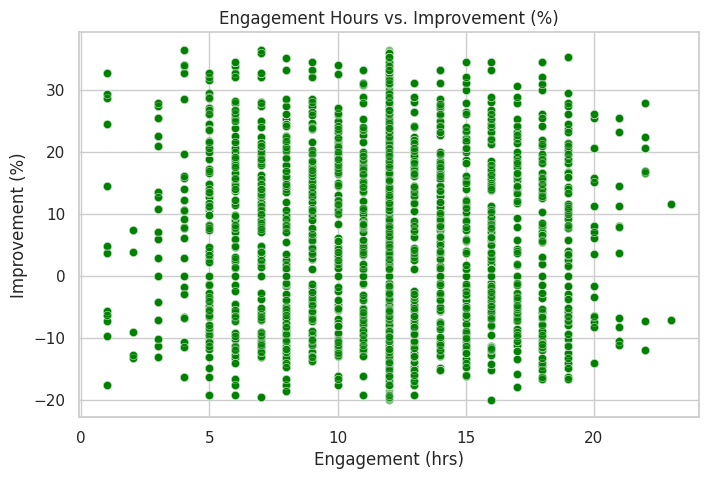

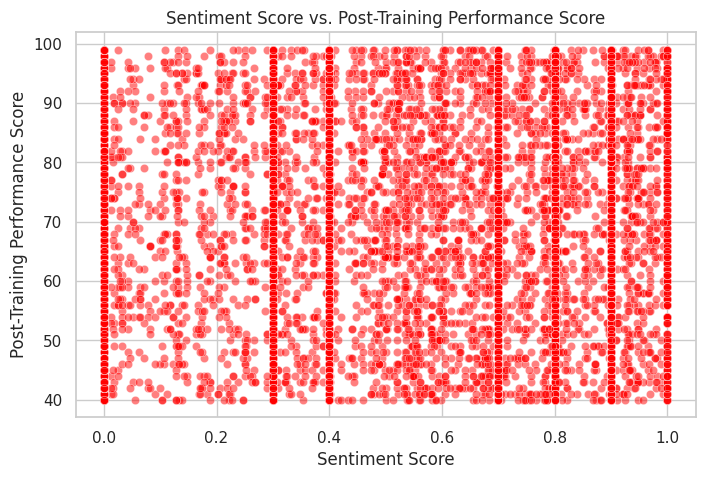

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/employee_training_data_cleaned.csv"
df = pd.read_csv(file_path)

# Handling missing values
# Fill numerical missing values with the median
df['Post_Training_Score'].fillna(df['Post_Training_Score'].median(), inplace=True)
df['Engagement (hrs)'].fillna(df['Engagement (hrs)'].median(), inplace=True)
df['Sentiment_Score'].fillna(df['Sentiment_Score'].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save cleaned data
df.to_csv("employee_training_data_cleaned_final.csv", index=False)

# Set visualization style
sns.set_theme(style="whitegrid")

# Distribution of Training Improvement (%)
plt.figure(figsize=(8, 5))
sns.histplot(df['Improvement (%)'], bins=30, kde=True, color='blue')
plt.title("Distribution of Training Improvement (%)")
plt.xlabel("Improvement (%)")
plt.ylabel("Frequency")
plt.show()

# Average Post-Training Score per Department
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby("Department")["Post_Training_Score"].mean().index,
            y=df.groupby("Department")["Post_Training_Score"].mean().values, palette="viridis")
plt.title("Average Post-Training Score by Department")
plt.xlabel("Department")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

# Engagement Hours vs. Improvement (%)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Engagement (hrs)"], y=df["Improvement (%)"], alpha=0.5, color="green")
plt.title("Engagement Hours vs. Improvement (%)")
plt.xlabel("Engagement (hrs)")
plt.ylabel("Improvement (%)")
plt.show()

# Sentiment Score vs. Post-Training Performance Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sentiment_Score"], y=df["Post_Training_Performance_Score"], alpha=0.5, color="red")
plt.title("Sentiment Score vs. Post-Training Performance Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Post-Training Performance Score")
plt.show()

📌 Model Evaluation Results:
{'Model': 'Linear Regression', 'MAE': 8.351321613964561, 'MSE': 107.0311050020522, 'R2 Score': 0.4680336176365709} 
 {'Model': 'Random Forest', 'MAE': 3.186386394045827, 'MSE': 34.753649418332216, 'R2 Score': 0.8272672868822329}


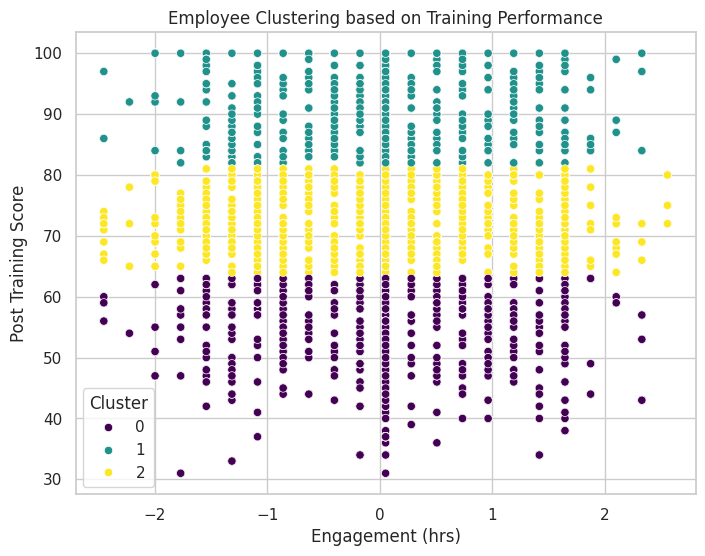

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("/content/employee_training_data_cleaned_final.csv")

# Encode categorical variables
label_encoders = {}
categorical_columns = ["Department", "Training_Program", "Completion_Status", "Learning_Style"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unnecessary columns
df.drop(columns=["Employee_ID", "Feedback"], inplace=True)

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ["Pre_Training_Score", "Engagement (hrs)", "Improvement (%)", "Sentiment_Score"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data for regression
X = df.drop(columns=["Post_Training_Score"])
y = df["Post_Training_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train, X_test, y_train, and y_test
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Impute missing values in y_train and y_test
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))  # Reshape for SimpleImputer
y_test = imputer.transform(y_test.values.reshape(-1, 1))  # Reshape for SimpleImputer

# Convert y_train and y_test back to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()


# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R2 Score": r2_score(y_true, y_pred)
    }

lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Final Output
print("📌 Model Evaluation Results:")
print(lr_results, "\n", rf_results)

# Clustering with K-Means
clustering_features = df[["Post_Training_Score", "Engagement (hrs)", "Improvement (%)"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(clustering_features)

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Engagement (hrs)"], y=df["Post_Training_Score"], hue=df["Cluster"], palette="viridis")
plt.title("Employee Clustering based on Training Performance")
plt.xlabel("Engagement (hrs)")
plt.ylabel("Post Training Score")
plt.legend(title="Cluster")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Load dataset
df = pd.read_csv("/content/employee_training_data_cleaned_final.csv")

# Encode categorical variables
label_encoders = {}
categorical_columns = ["Department", "Training_Program", "Completion_Status", "Learning_Style"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unnecessary columns
df.drop(columns=["Employee_ID", "Feedback"], inplace=True)

# Handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ["Pre_Training_Score", "Engagement (hrs)", "Improvement (%)", "Sentiment_Score"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data
X = df.drop(columns=["Post_Training_Score"])
y = df["Post_Training_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Feature selection using RFE
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
X_train = rfe.fit_transform(X_train, y_train)
X_test = rfe.transform(X_test)

# PCA for dimensionality reduction
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,  # Reduced cross-validation for faster training
    n_iter=5,  # Limits the number of hyperparameter combinations
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

# Best Random Forest model
rf_model = rf_grid.best_estimator_
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R2 Score": r2_score(y_true, y_pred)
    }

lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Final Output
print("📌 Improved Model Evaluation Results:")
print(lr_results, "\n", rf_results)


📌 Improved Model Evaluation Results:
{'Model': 'Linear Regression', 'MAE': 6.532210300964654, 'MSE': 79.5121070850983, 'R2 Score': 0.5701781522293421} 
 {'Model': 'Random Forest', 'MAE': 3.954392457458409, 'MSE': 43.66233488693161, 'R2 Score': 0.7639727313603111}


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Load dataset
df = pd.read_csv("/content/employee_training_data_cleaned_final.csv")

# Encode categorical variables
label_encoders = {}
categorical_columns = ["Department", "Training_Program", "Completion_Status", "Learning_Style"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unnecessary columns
df.drop(columns=["Employee_ID", "Feedback"], inplace=True)

# Handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ["Pre_Training_Score", "Engagement (hrs)", "Improvement (%)", "Sentiment_Score"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Convert Post_Training_Score to classification labels
def classify_score(score):
    if score <= 50:
        return 0  # Low Performance
    elif 51 <= score <= 75:
        return 1  # Medium Performance
    else:
        return 2  # High Performance

df["Performance_Class"] = df["Post_Training_Score"].apply(classify_score)

# Split data
X = df.drop(columns=["Post_Training_Score", "Performance_Class"])
y = df["Performance_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Feature selection using RFE
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
X_train = rfe.fit_transform(X_train, y_train)
X_test = rfe.transform(X_test)

# PCA for dimensionality reduction
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = np.round(lr_model.predict(X_test)).astype(int)  # Convert predictions to class labels

# Train Random Forest with optimized hyperparameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    n_iter=5,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

# Best Random Forest model
rf_model = rf_grid.best_estimator_
rf_model.fit(X_train, y_train)
y_pred_rf = np.round(rf_model.predict(X_test)).astype(int)  # Convert predictions to class labels

# Ensure predictions are within the valid class range [0,1,2]
y_pred_lr = np.clip(y_pred_lr, 0, 2)
y_pred_rf = np.clip(y_pred_rf, 0, 2)

# Evaluate models (Regression)
def evaluate_regression(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R2 Score": r2_score(y_true, y_pred)
    }

lr_results = evaluate_regression(y_test, y_pred_lr, "Linear Regression")
rf_results = evaluate_regression(y_test, y_pred_rf, "Random Forest")

# Evaluate models (Classification)
def evaluate_classification(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1 Score": f1_score(y_true, y_pred, average="weighted")
    }

lr_classification_results = evaluate_classification(y_test, y_pred_lr, "Linear Regression (Classified)")
rf_classification_results = evaluate_classification(y_test, y_pred_rf, "Random Forest (Classified)")

# Print Results as Tables
print("\n📌 Regression Model Evaluation:")
regression_table = pd.DataFrame([lr_results, rf_results])
print(regression_table)

print("\n📌 Classification Model Evaluation:")
classification_table = pd.DataFrame([lr_classification_results, rf_classification_results])
print(classification_table)



📌 Regression Model Evaluation:
               Model       MAE       MSE  R2 Score
0  Linear Regression  0.226055  0.227765  0.315448
1      Random Forest  0.095781  0.096921  0.708701

📌 Classification Model Evaluation:
                            Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Classified)  0.774800   0.769762  0.774800  0.769110
1      Random Forest (Classified)  0.904789   0.906192  0.904789  0.904971


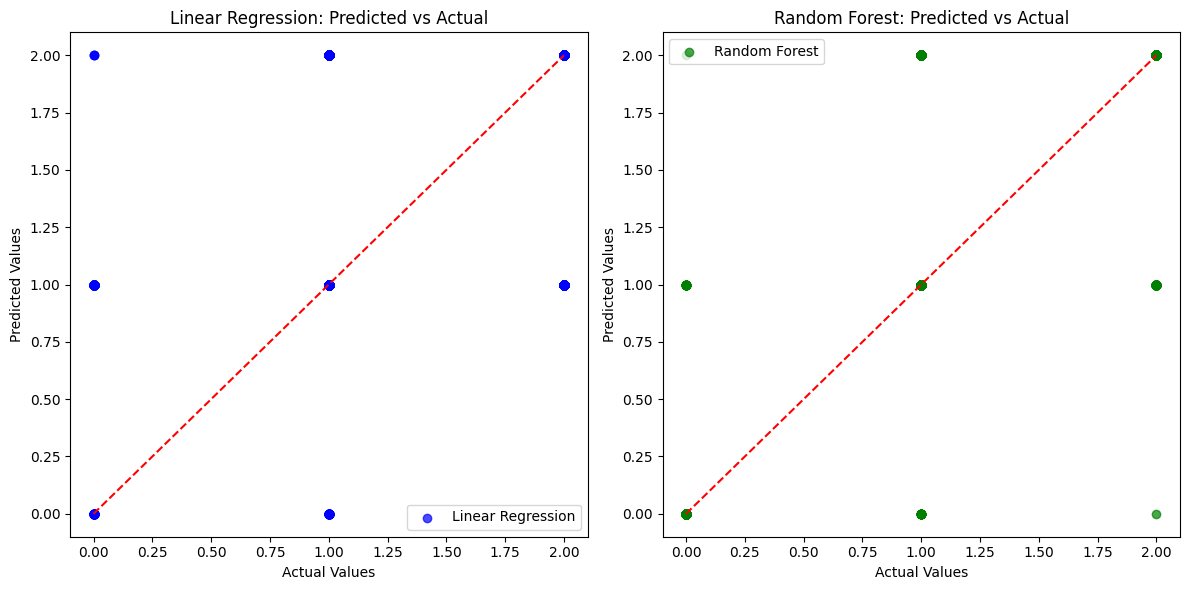

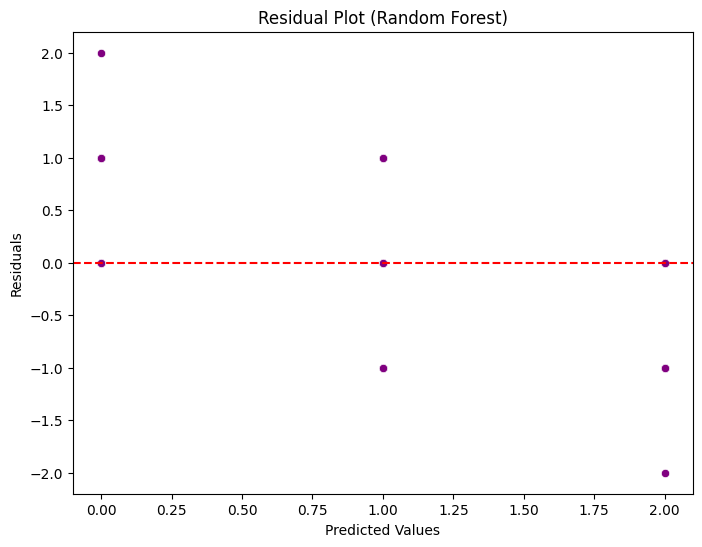

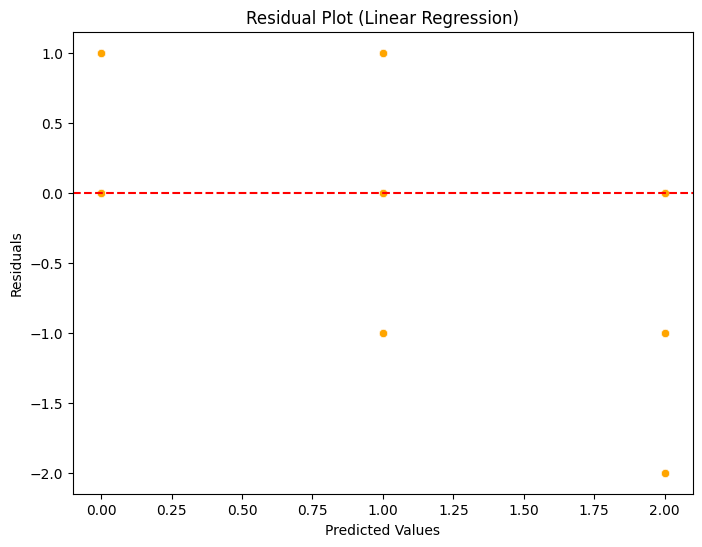

<Figure size 800x600 with 0 Axes>

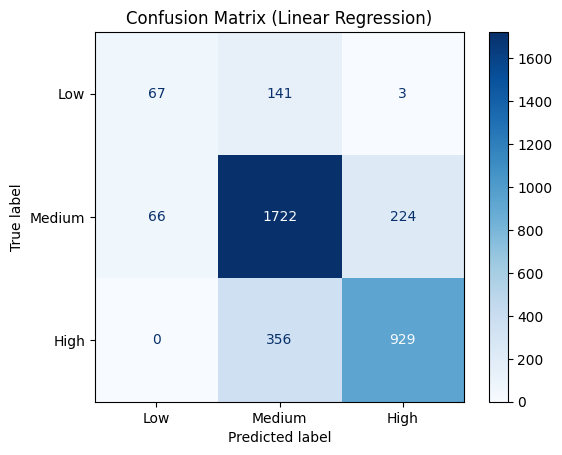

<Figure size 800x600 with 0 Axes>

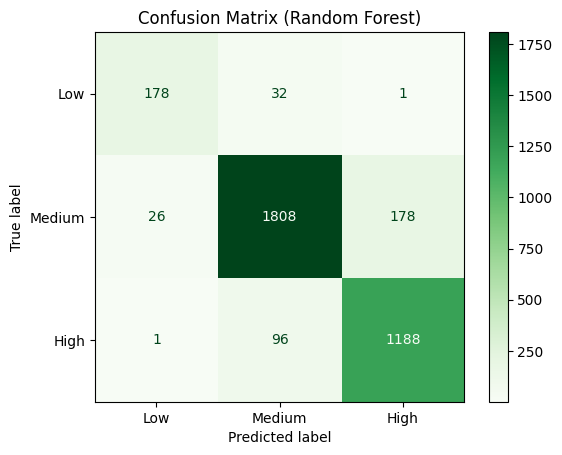

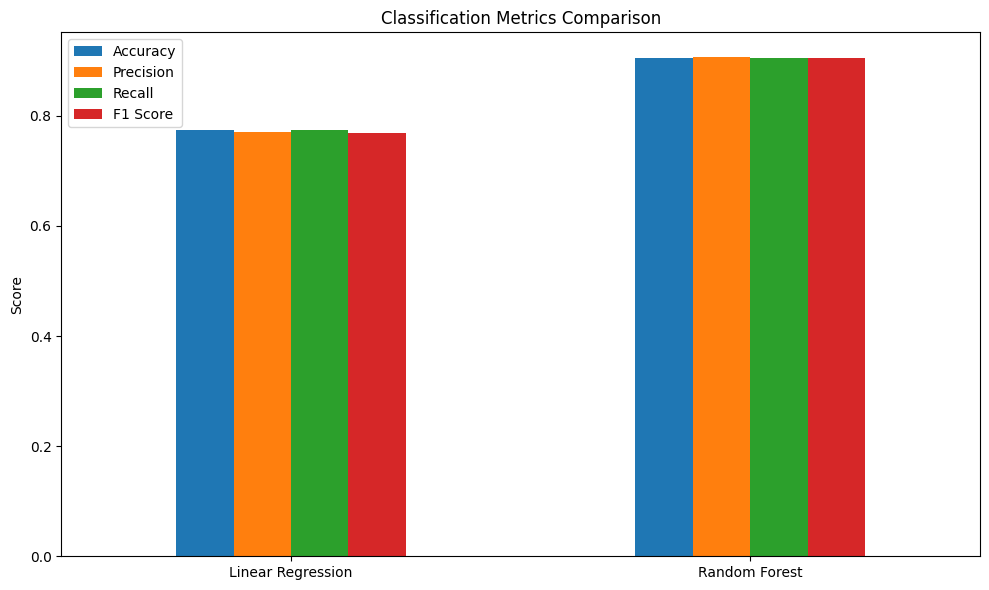

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_regression_results(y_test, y_pred_lr, y_pred_rf):
    # Predicted vs Actual (Linear Regression)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_lr, color='blue', label="Linear Regression", alpha=0.7)
    plt.title('Linear Regression: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.legend()

    # Predicted vs Actual (Random Forest)
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_rf, color='green', label="Random Forest", alpha=0.7)
    plt.title('Random Forest: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Residual Plot for Random Forest
    residual_rf = y_test - y_pred_rf
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_rf, y=residual_rf, color='purple')
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot (Random Forest)")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    # Residual Plot for Linear Regression
    residual_lr = y_test - y_pred_lr
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_lr, y=residual_lr, color='orange')
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot (Linear Regression)")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

def plot_classification_results(y_test, y_pred_lr, y_pred_rf):
    # Confusion Matrix for Linear Regression (Classified)
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Low", "Medium", "High"])
    plt.figure(figsize=(8, 6))
    cm_display_lr.plot(cmap="Blues")
    plt.title("Confusion Matrix (Linear Regression)")
    plt.show()

    # Confusion Matrix for Random Forest (Classified)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Low", "Medium", "High"])
    plt.figure(figsize=(8, 6))
    cm_display_rf.plot(cmap="Greens")
    plt.title("Confusion Matrix (Random Forest)")
    plt.show()

    # Accuracy, Precision, Recall, F1 Score bar plot
    metrics = {
        "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
        "Precision": [precision_score(y_test, y_pred_lr, average="weighted"), precision_score(y_test, y_pred_rf, average="weighted")],
        "Recall": [recall_score(y_test, y_pred_lr, average="weighted"), recall_score(y_test, y_pred_rf, average="weighted")],
        "F1 Score": [f1_score(y_test, y_pred_lr, average="weighted"), f1_score(y_test, y_pred_rf, average="weighted")]
    }

    metrics_df = pd.DataFrame(metrics, index=["Linear Regression", "Random Forest"])
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Classification Metrics Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Assuming you already have your y_test, y_pred_lr, and y_pred_rf
# Example usage of the functions:
plot_regression_results(y_test, y_pred_lr, y_pred_rf)  # Regression Results Visualization
plot_classification_results(y_test, y_pred_lr, y_pred_rf)  # Classification Results Visualization


